In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurar estilo gráfico
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Ruta a los resultados Docker
results_path = os.path.abspath(os.path.join("..", "results_docker"))
csv_path = os.path.join(results_path, "docker_scenarios_results.csv")


# Cargar datos
df_docker = pd.read_csv(csv_path)
df_docker['timestamp'] = pd.to_datetime(df_docker['timestamp'], format="%Y%m%d_%H%M%S")

# Mostrar últimos registros
display(df_docker.tail())

,timestamp,test_type,cpu_percent,memory_mb,execution_time_sec,source
85,2025-05-18 18:38:25,memory_large,100.00,5.87,1.33,Docker
86,2025-05-18 18:38:26,disk_write,37.29,6.70,1.56,Docker
87,2025-05-18 18:38:28,disk_read,99.71,7.71,1.32,Docker
88,2025-05-18 18:38:28,network_download,36.48,7.39,0.10,Docker
89,2025-05-18 18:38:33,process_spawn,2.16,9.94,5.04,Docker


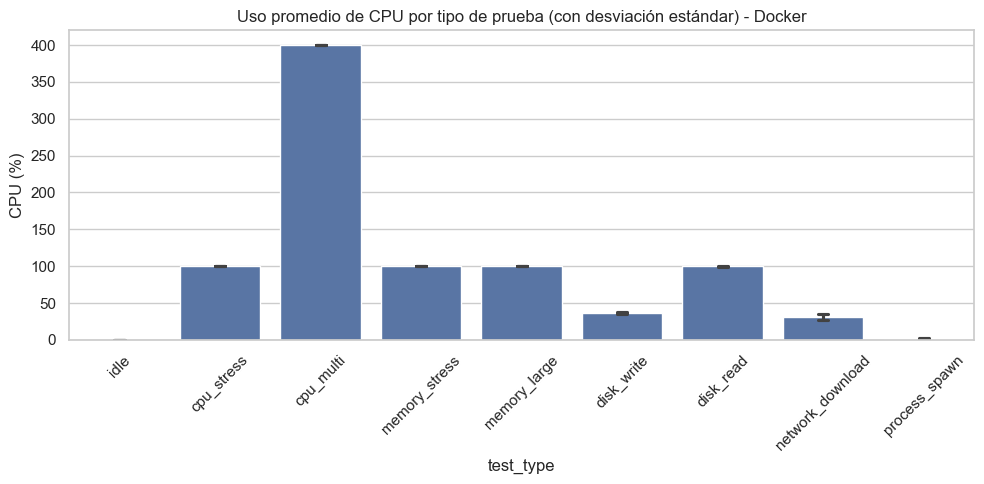

In [30]:
plt.figure()
sns.barplot(data=df_docker, x="test_type", y="cpu_percent", errorbar='sd', capsize=0.1)
plt.title("Uso promedio de CPU por tipo de prueba (con desviación estándar) - Docker")
plt.ylabel("CPU (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

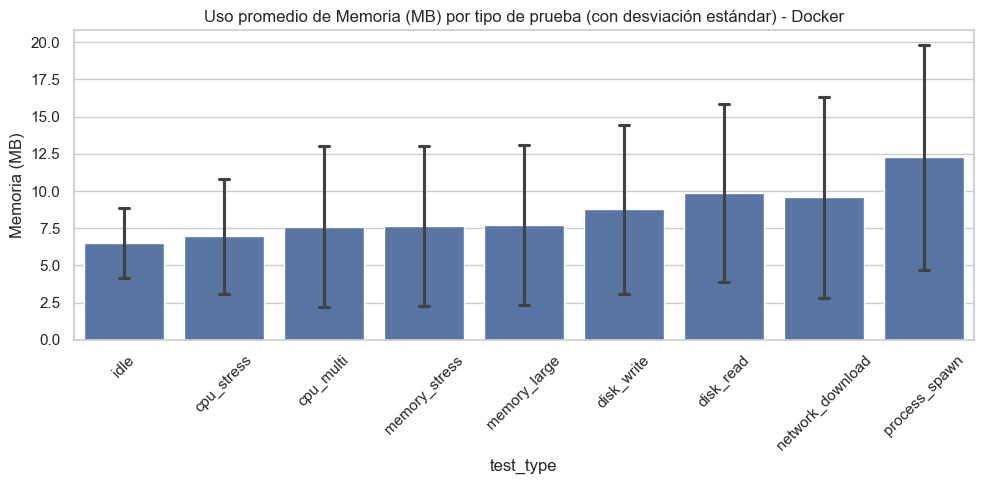

In [31]:
plt.figure()
sns.barplot(data=df_docker, x="test_type", y="memory_mb", errorbar='sd', capsize=0.1)
plt.title("Uso promedio de Memoria (MB) por tipo de prueba (con desviación estándar) - Docker")
plt.ylabel("Memoria (MB)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

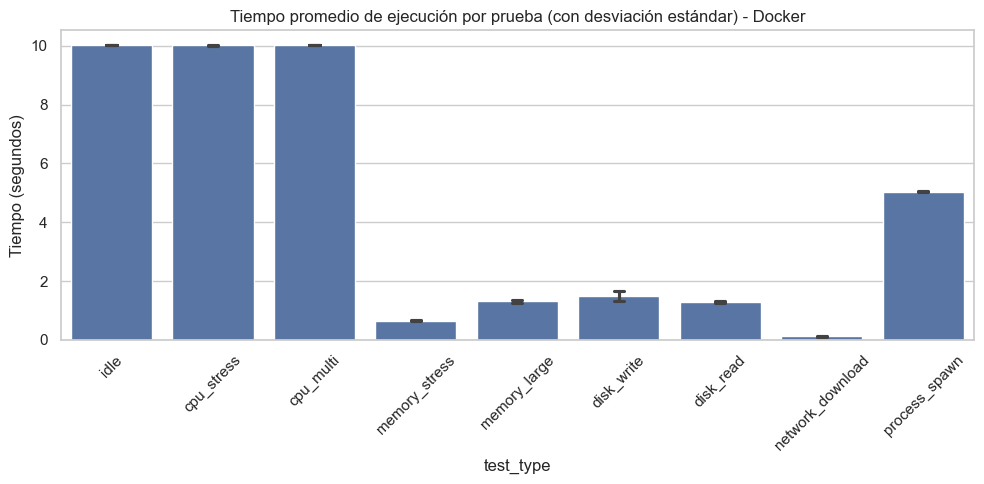

In [32]:
plt.figure()
sns.barplot(data=df_docker, x="test_type", y="execution_time_sec", errorbar='sd', capsize=0.1)
plt.title("Tiempo promedio de ejecución por prueba (con desviación estándar) - Docker")
plt.ylabel("Tiempo (segundos)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
grouped = df_docker.groupby("test_type").agg({
    "cpu_percent": ['mean', 'std'],
    "memory_mb": ['mean', 'std'],
    "execution_time_sec": ['mean', 'std']
}).round(2)

grouped.columns = ['CPU_mean', 'CPU_std', 'Mem_mean_MB', 'Mem_std_MB', 'Time_mean', 'Time_std']
display(grouped.sort_values("CPU_mean", ascending=False))

,CPU_mean,CPU_std,Mem_mean_MB,Mem_std_MB,Time_mean,Time_std
test_type,,,,,,
cpu_multi,399.75,0.05,7.60,5.42,10.01,0.00
memory_stress,100.03,0.10,7.65,5.39,0.65,0.02
memory_large,100.01,0.04,7.69,5.38,1.31,0.04
cpu_stress,99.98,0.07,6.96,3.89,10.01,0.01
disk_read,99.64,0.20,9.86,5.99,1.29,0.02
disk_write,36.64,0.96,8.78,5.69,1.49,0.17
network_download,30.82,3.89,9.57,6.76,0.12,0.03
process_spawn,1.79,0.40,12.26,7.54,5.04,0.01
idle,0.00,0.00,6.51,2.32,10.01,0.00
